In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

In [2]:
#Fast pulse definition
def FastPulse(w0, gamma, alphap, delta, area, t):
    
    E_0 = area/np.sqrt(2*np.pi) #Amplitud --- Area of pure gaussian pulse: sqrt(2*pi)

    #Pulse with chirp and Noch
    g1 = np.exp(-.5*((t**2)*(gamma**(-2)+1j*alphap)/(gamma**(-4)+alphap**2) + 2j*w0*t))/np.sqrt(gamma**(-2)-1j*alphap)
    g2 = np.exp(-.5*((t**2)*(gamma**(-2)+delta**(-2)+1j*alphap)/((gamma**(-2)+delta**(-2))**2+alphap**2) + 2j*w0*t))/np.sqrt(gamma**(-2)+delta**(-2)-1j*alphap)
    
    return E_0*(g1-g2)

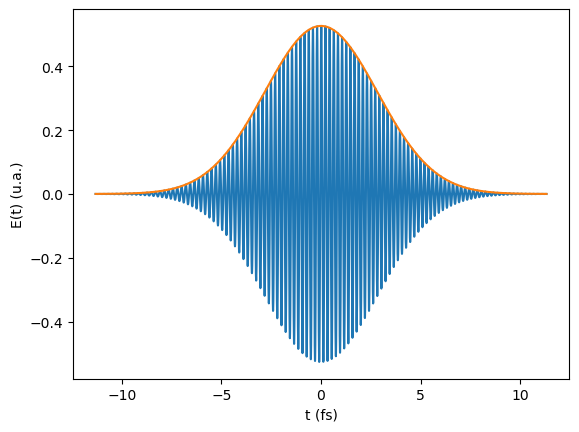

In [3]:
#Parameters
w0 = 30             #Central frecuency
area = np.pi        #Area of pure gaussian pulse
gamma = .5          #Spectral width
alphap = gamma**(-2)          #Chrip constant
delta = 1e-10       #Noch spectral width




#plot
T = 4*np.sqrt((1+(alphap**2)*(gamma**4))/gamma**2)
time = np.linspace(-T, T, 10000)
pulse = FastPulse(w0, gamma, alphap, delta, area, time)

plt.plot(time, np.real(pulse))      #real part of the pulse
plt.plot(time, np.abs(pulse))       #Envelope

plt.xlabel('t (fs)')
plt.ylabel('E(t) (u.a.)')

plt.show()


In [4]:
#Pulse area
quad(lambda t: np.abs(FastPulse(w0, gamma, alphap, delta, area, t)), -np.inf, np.inf)[0]

3.7360043302611445

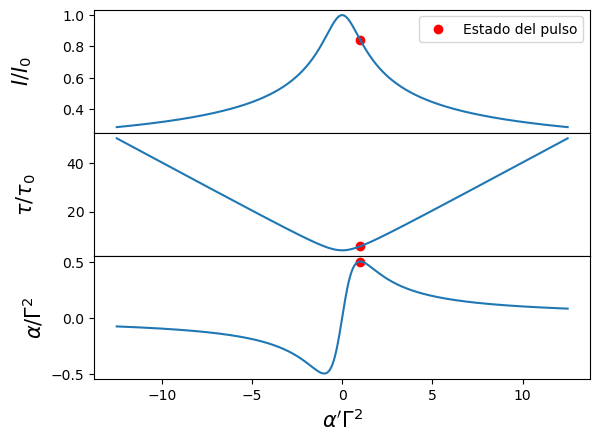

In [5]:
#Different parameters as a function of the chirp parameter alpha prime
Alphap = np.linspace(-50, 50, 1000)

#Pick intensity
def Intensity(alphap): return np.abs(FastPulse(w0, gamma, alphap, delta, area, 0))

Intensity = np.vectorize(Intensity)

#Time amplitude
def Tau(Alphap): return np.sqrt(gamma**(-4)+Alphap**2)/gamma

#Chrip alpha
def Alpha(Alphap): return Alphap/(gamma**(-4)+Alphap**2)

fig = plt.figure()
fig.subplots_adjust(hspace=0)

ax1 = fig.add_subplot(3,1,1)
ax1.plot(Alphap*gamma**2, Intensity(Alphap)/np.abs(FastPulse(w0, gamma, 0, delta, area, 0)))
ax1.scatter(alphap*gamma**2, Intensity(alphap)/np.abs(FastPulse(w0, gamma, 0, delta, area, 0)), color = 'red', label='Estado del pulso')
ax1.set_ylabel(r'$I/I_0$'+'\n', size=15)
ax1.legend()

ax2 = fig.add_subplot(3,1,2)
ax2.plot(Alphap*gamma**2, Tau(Alphap)*gamma)
ax2.scatter(alphap*gamma**2, Tau(alphap)*gamma, color = 'red')
ax2.set_ylabel(r'$\tau/\tau_0$'+'\n', size=15)

ax3 = fig.add_subplot(3,1,3)
ax3.plot(Alphap*gamma**2, Alpha(Alphap)/gamma**2)
ax3.scatter(alphap*gamma**2, Alpha(alphap)/gamma**2, color = 'red')
ax3.set_ylabel(r'$\alpha/\Gamma^2$', size=15)

plt.xlabel(r"$\alpha'\Gamma^2$", size=15)

plt.show()